In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:

!pip install -q keras

In [3]:
!rm * -r
!git clone https://github.com/prabhunithingollapudi007/SignLanguageTranslation.git

Cloning into 'SignLanguageTranslation'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 24 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [4]:
!cd SignLanguageTranslation/
!ls

SignLanguageTranslation


In [5]:
!unzip SignLanguageTranslation/train.zip

Archive:  SignLanguageTranslation/train.zip
   creating: train/
   creating: train/Eights/
  inflating: train/Eights/sample1.jpg  
  inflating: train/Eights/sample10.jpg  
  inflating: train/Eights/sample2.jpg  
  inflating: train/Eights/sample3.jpg  
  inflating: train/Eights/sample4.jpg  
  inflating: train/Eights/sample5.jpg  
  inflating: train/Eights/sample6.jpg  
  inflating: train/Eights/sample7.jpg  
  inflating: train/Eights/sample8.jpg  
  inflating: train/Eights/sample9.jpg  
   creating: train/Fives/
  inflating: train/Fives/sample1.jpg  
  inflating: train/Fives/sample10.jpg  
  inflating: train/Fives/sample2.jpg  
  inflating: train/Fives/sample3.jpg  
  inflating: train/Fives/sample4.jpg  
  inflating: train/Fives/sample5.jpg  
  inflating: train/Fives/sample6.jpg  
  inflating: train/Fives/sample7.jpg  
  inflating: train/Fives/sample8.jpg  
  inflating: train/Fives/sample9.jpg  
   creating: train/Fours/
  inflating: train/Fours/sample1.jpg  
  inflating: train/Fours/s

In [6]:
!ls

SignLanguageTranslation  train


In [7]:
!ls train/

Eights	Fives  Fours  Nines  Ones  Sevens  Sixes  Threes  Twos


In [0]:
from glob import glob
from sklearn.model_selection import train_test_split

In [0]:
from glob import glob

from sklearn.model_selection import train_test_split


ones = glob('train/Ones/*.jpg')
twos = glob('train/Twos/*.jpg')
threes = glob('train/Threes/*.jpg')
fours = glob('train/Fours/*.jpg')
fives = glob('train/Fives/*.jpg')
sixes = glob('train/Sixes/*.jpg')
sevens = glob('train/Sevens/*.jpg')
eights = glob('train/Eights/*.jpg')
nines = glob('train/Nines/*.jpg')

In [0]:
ones_train, ones_test = train_test_split(ones, test_size=0.2)
twos_train, twos_test = train_test_split(twos, test_size=0.2)
threes_train, threes_test = train_test_split(threes, test_size=0.2)

fours_train, fours_test = train_test_split(fours, test_size=0.2)
fives_train, fives_test = train_test_split(fives, test_size=0.2)
sixes_train, sixes_test = train_test_split(sixes, test_size=0.2)

sevens_train, sevens_test = train_test_split(sevens, test_size=0.2)
eights_train, eights_test = train_test_split(eights, test_size=0.2)
nines_train, nines_test = train_test_split(nines, test_size=0.2)

In [11]:
print(nines_train)

['train/Nines/sample9.jpg', 'train/Nines/sample10.jpg', 'train/Nines/sample1.jpg', 'train/Nines/sample3.jpg', 'train/Nines/sample5.jpg', 'train/Nines/sample4.jpg', 'train/Nines/sample2.jpg', 'train/Nines/sample8.jpg']


In [0]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'

!mkdir test

!mkdir test/One
files = ' '.join(ones_test)
!mv -t test/One $files

!mkdir test/Two
files = ' '.join(twos_test)
!mv -t test/Two $files

!mkdir test/Three
files = ' '.join(threes_test)
!mv -t test/Three $files

!mkdir test/Four
files = ' '.join(fours_test)
!mv -t test/Four $files

!mkdir test/Five
files = ' '.join(fives_test)
!mv -t test/Five $files

!mkdir test/Six
files = ' '.join(sixes_test)
!mv -t test/Six $files

!mkdir test/Seven
files = ' '.join(sevens_test)
!mv -t test/Seven $files

!mkdir test/Eight
files = ' '.join(eights_test)
!mv -t test/Eight $files

!mkdir test/Nine
files = ' '.join(nines_test)
!mv -t test/Nine $files

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


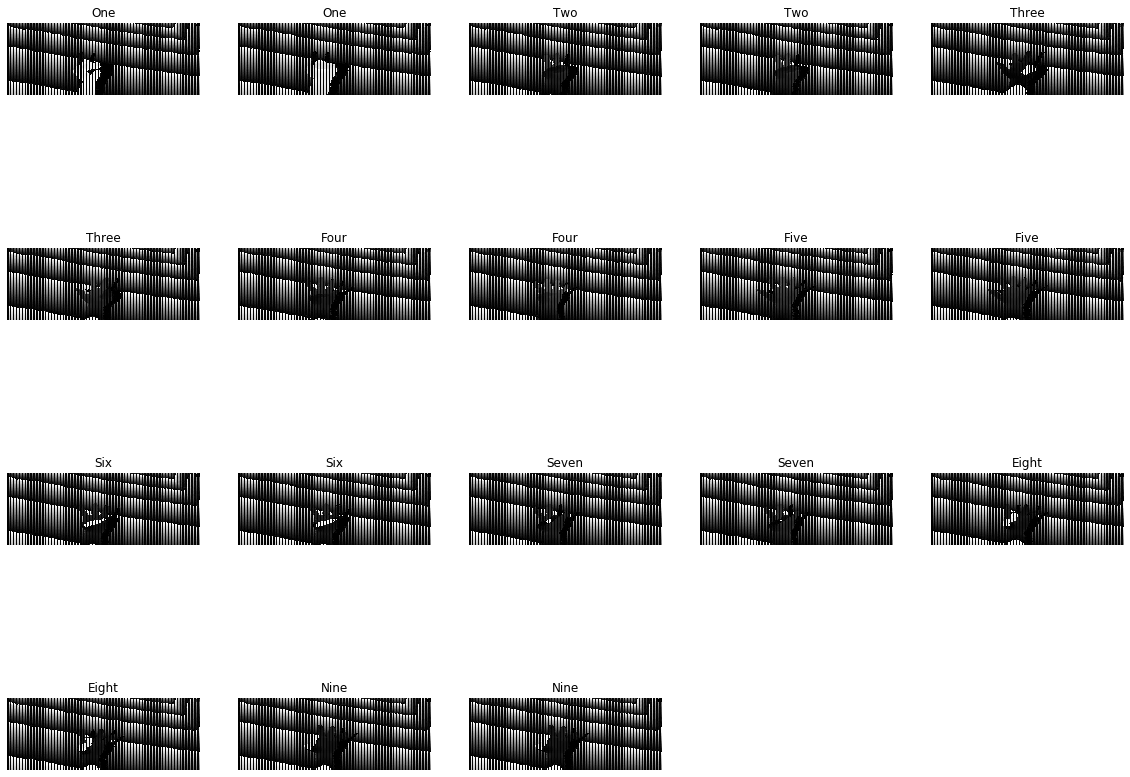

In [14]:
ones = np.random.choice(ones_train, 2)
twos = np.random.choice(twos_train, 2)
threes = np.random.choice(threes_train, 2)

fours = np.random.choice(fours_train, 2)
fives = np.random.choice(fives_train, 2)
sixes = np.random.choice(sixes_train, 2)

sevens = np.random.choice(sevens_train, 2)
eights = np.random.choice(eights_train, 2)
nines = np.random.choice(nines_train, 2)

data = np.concatenate((ones, twos, threes, fours, fives, sixes, sevens, eights, nines))
labels = 2 * ['One'] + 2 *['Two'] + 2 *['Three'] + 2 *['Four'] + 2 *['Five'] + 2 *['Six'] + 2 *['Seven'] + 2 *['Eight'] + 2 *['Nine']

N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

In [15]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 9
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.







87916544/87910968 [==============================] - 7s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [16]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 640
HEIGHT = 240
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 72 images belonging to 9 classes.
Found 18 images belonging to 9 classes.


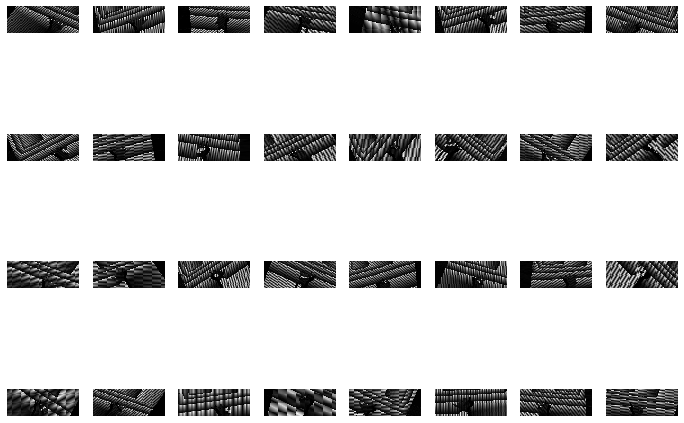

In [17]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

In [19]:
EPOCHS = 10
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'filename.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Epoch 1/10
320/320 [==============================] - 367s 1s/step - loss: 1.8865 - acc: 0.3105 - val_loss: 2.5288 - val_acc: 0.1276
Epoch 2/10
320/320 [==============================] - 368s 1s/step - loss: 1.8421 - acc: 0.3348 - val_loss: 2.3348 - val_acc: 0.1745
Epoch 3/10
320/320 [==============================] - 364s 1s/step - loss: 1.8191 - acc: 0.3390 - val_loss: 2.4621 - val_acc: 0.1615
Epoch 4/10
320/320 [==============================] - 360s 1s/step - loss: 1.8103 - acc: 0.3406 - val_loss: 2.6692 - val_acc: 0.1875
Epoch 5/10
320/320 [==============================] - 362s 1s/step - loss: 1.7949 - acc: 0.3437 - val_loss: 2.5187 - val_acc: 0.1753
Epoch 6/10
320/320 [==============================] - 363s 1s/step - loss: 1.7690 - acc: 0.3632 - val_loss: 2.4849 - val_acc: 0.1693
Epoch 7/10
320/320 [==============================] - 362s 1s/step - loss: 1.7789 - acc: 0.3644 - val_loss: 2.5675 - val_acc: 0.1797
Epoch 8/10
320/320 [==============================] - 365s 1s/step - 

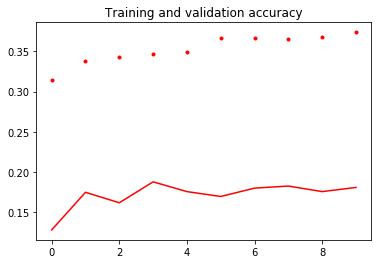

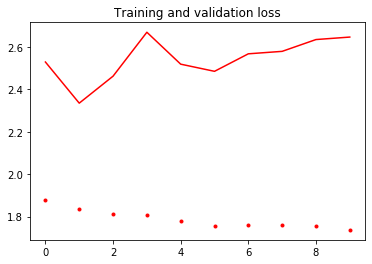

In [20]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from keras.preprocessing import image
from keras.models import load_model


def predict(model, img):
    """Run model prediction on image
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]


def plot_preds(img, preds):
    """Displays image and the top-n predicted probabilities in a bar graph
    Args:
        preds: list of predicted labels and their probabilities
    """
    labels = ("one", "two")
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    plt.figure(figsize=(8,8))
    plt.subplot(gs[0])
    plt.imshow(np.asarray(img))
    plt.subplot(gs[1])
    plt.barh([0, 1], preds, alpha=0.5)
    plt.yticks([0, 1], labels)
    plt.xlabel('Probability')
    plt.xlim(0, 1)
    plt.tight_layout()

In [0]:
model = load_model(MODEL_FILE)

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [24]:
!ls test/Two

sample3.jpg  sample6.jpg


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
outputs_test = model.predict_generator(validation_generator)

In [27]:
print(outputs_test)

[[0.01905093 0.01234618 0.02180462 0.01265194 0.13167337 0.09047767
  0.36246645 0.13404673 0.21548216]
 [0.00323088 0.00481985 0.07878041 0.00653773 0.04496725 0.1492266
  0.28915894 0.21640405 0.20687422]
 [0.00568132 0.00383025 0.01188447 0.00524597 0.11158387 0.02571817
  0.1052549  0.43830448 0.29249656]
 [0.04101044 0.02463499 0.03809855 0.03632312 0.08886609 0.05645721
  0.39982742 0.14664122 0.16814102]
 [0.0257761  0.00730097 0.04500833 0.00344973 0.06951296 0.12673898
  0.34887257 0.09619052 0.27714986]
 [0.0342434  0.00564051 0.01664503 0.039198   0.0712323  0.07876099
  0.23967212 0.2865503  0.2280573 ]
 [0.03555305 0.01662617 0.04153372 0.05154069 0.10300536 0.04779699
  0.41191185 0.09126326 0.20076895]
 [0.02901817 0.02332459 0.03015894 0.02257008 0.12100318 0.11464483
  0.22941008 0.19654846 0.23332164]
 [0.00982033 0.00629311 0.06289534 0.02554965 0.22666594 0.01719148
  0.27926585 0.19748747 0.17483076]
 [0.01885217 0.01016308 0.01892552 0.02184022 0.22550711 0.190135

In [0]:
import numpy

In [29]:
predictions = []
for array in outputs_test:
  temp = [x for x in array]
  max_value = max(temp)
  print("max value:%f, %d" %(max_value,temp.index(max_value) + 1))
  predictions.append(temp.index(max_value) + 1)

max value:0.362466, 7
max value:0.289159, 7
max value:0.438304, 8
max value:0.399827, 7
max value:0.348873, 7
max value:0.286550, 8
max value:0.411912, 7
max value:0.233322, 9
max value:0.279266, 7
max value:0.248009, 7
max value:0.402607, 7
max value:0.659052, 8
max value:0.285648, 7
max value:0.416312, 7
max value:0.352717, 8
max value:0.546335, 8
max value:0.531996, 8
max value:0.638460, 7


In [0]:
true_values = [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

In [31]:
confusion_matrix(true_values, predictions)

array([[0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0]])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(true_values, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.18      1.00      0.31         2
           8       0.33      1.00      0.50         2
           9       0.00      0.00      0.00         2

    accuracy                           0.22        18
   macro avg       0.06      0.22      0.09        18
weighted avg       0.06      0.22      0.09        18



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
